#Here is the final project: I had a dataset and I had to analyze it

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np

In [ ]:
 datas = pd.read_csv('https://raw.githubusercontent.com/BriceNW/UE_AAA/main/housing.csv')
datas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#Starting by cleaning the dataset

In [ ]:
datas.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [ ]:
datas['total_bedrooms'].fillna(0,inplace=True)

In [ ]:
datas.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

#Trying to find correlation between variables

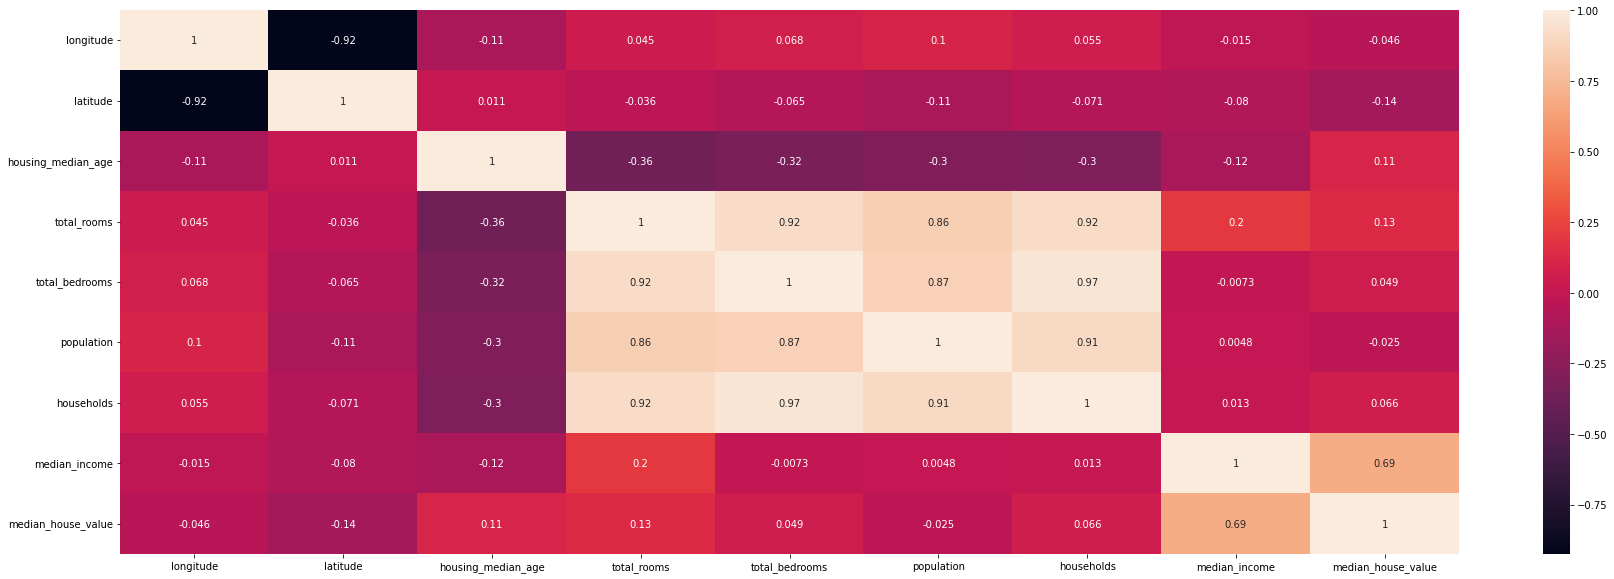

In [ ]:
datas_corr = datas.corr()
plt.figure(figsize=(30,10))

sns.heatmap(datas_corr, annot=True)

In [ ]:
datas_corr= datas_corr.loc[['total_rooms'], :].drop(['total_rooms'], axis=1)
datas_var = datas_corr[abs(datas_corr) >= 0.5].dropna(axis=1)
datas_var.columns.tolist()

['total_bedrooms', 'population', 'households']

#Determining the number of bedrooms from the population and the households.

- 1st method: Linear regression

In [ ]:
y = datas['total_bedrooms']
X = datas[['population','households']]

In [ ]:
#création du jeux de données d'entraînement et de tests 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, train_size=0.75)

model = LinearRegression()
model.fit(X_train,y_train)

y_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

In [ ]:
print("score sur les données de train: ", model.score(X_train,y_train))
print("score sur les données de test: ", model.score(X_test,y_test))

score sur les données de train:  0.928431680082565
score sur les données de test:  0.9520655179803773


In [ ]:
datas['Predicted_bedrooms'] = model.predict(datas[['population','households']])

- Graph with the households as the variable

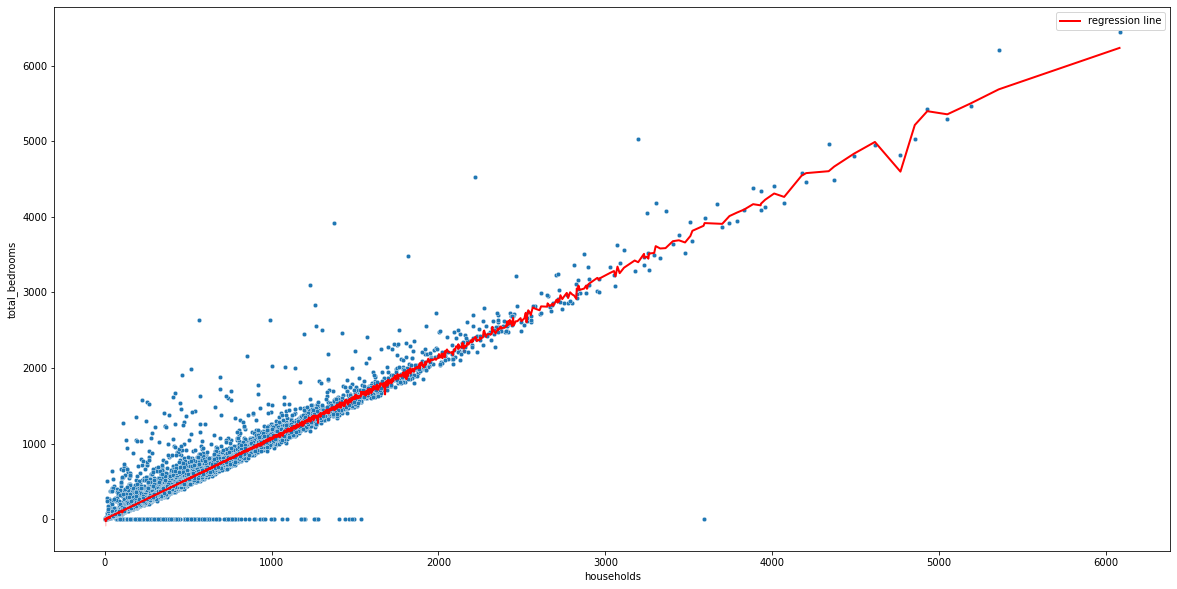

In [ ]:
fig = plt.figure(figsize=(20,10))

sns.scatterplot(data=datas, x = datas['households'], y = datas['total_bedrooms'], s=20)
sns.lineplot(x = datas['households'], y = datas['Predicted_bedrooms'], color='red', label='regression line', linewidth=2.0)

- Graph with the population as the variable



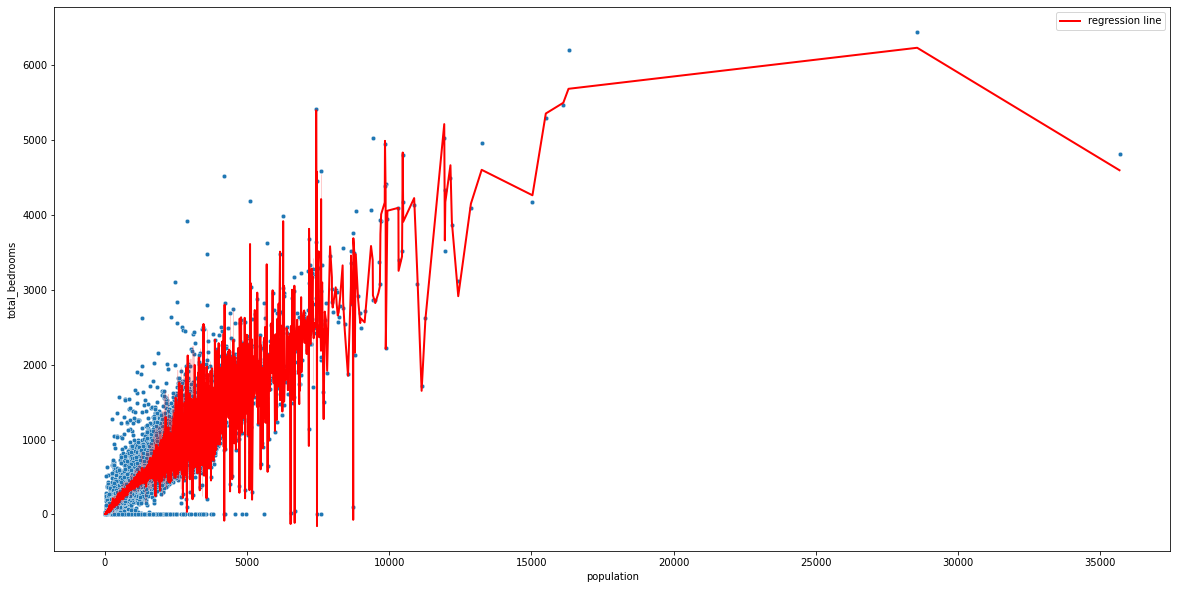

In [ ]:
fig = plt.figure(figsize=(20,10))

sns.scatterplot(data=datas, x = datas['population'], y = datas['total_bedrooms'], s=20)
sns.lineplot(x = datas['population'], y = datas['Predicted_bedrooms'], color='red', label='regression line', linewidth=2.0)

- 3D display with both prediction variables and the predicted variable

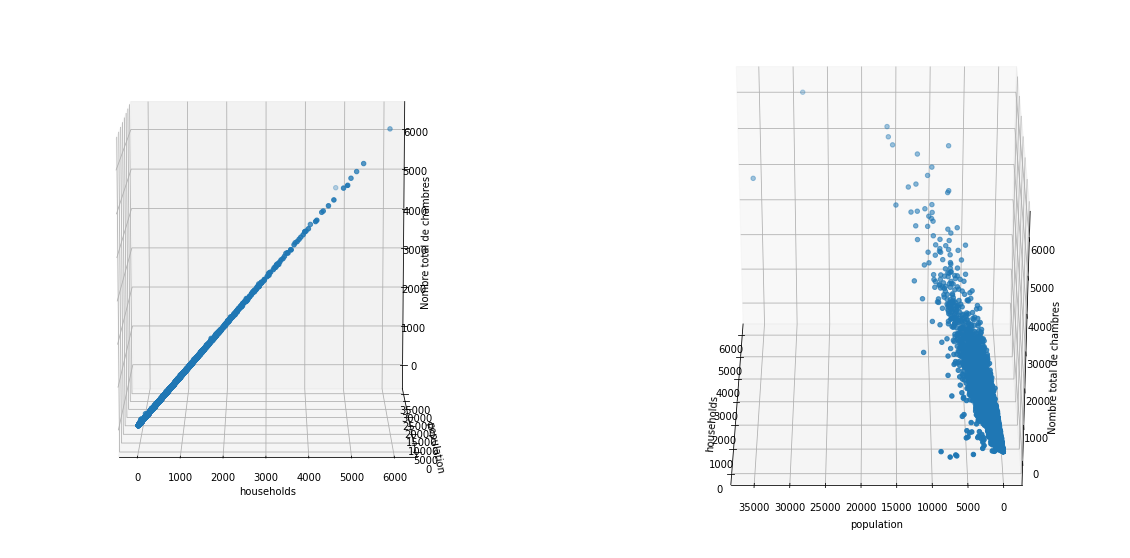

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection = '3d')
ax.scatter(datas['households'], datas['population'], datas['Predicted_bedrooms'])
ax.view_init(elev=10, azim=-90)
ax.set_xlabel('households')
ax.set_ylabel('population')
ax.set_zlabel('Nombre total de chambres')

ax2 = fig.add_subplot(122, projection = '3d')
ax2.scatter(datas['households'], datas['population'], datas['Predicted_bedrooms'])
ax2.view_init(elev=30, azim=-180)
ax2.set_xlabel('households')
ax2.set_ylabel('population')
ax2.set_zlabel('Nombre total de chambres')

plt.show()


Metrics computing

In [ ]:
y_pred=model.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('RMSE =', mean_squared_error(y_test, y_pred))


MAE = 39.11956316070154
RMSE = 9178.917098781501


- 2nd method: KNeighbors method

In [ ]:
#instanciation du scaler et détermination de la transformation à appliquer aux données
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
#application de la transformation aux données
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

Tested various numbers of neighbors and keeping the best value for K (K=20)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=20, weights='distance', metric='minkowski', p=2)
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [ ]:
print("Score sur serie train: ", knn.score(x_train_scaled, y_train))
print("Score sur serie test: ", knn.score(x_test_scaled, y_test))

Score sur serie train:  0.9995169583591996
Score sur serie test:  0.9467131768451986


There is a small overfitting

In [ ]:
y_pred=knn.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('RMSE =', mean_squared_error(y_test, y_pred))

MAE = 3784.0184836140184
RMSE = 14506850.862274861


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


## Cleaning even more datas

Visualizing dispersion with box plots

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


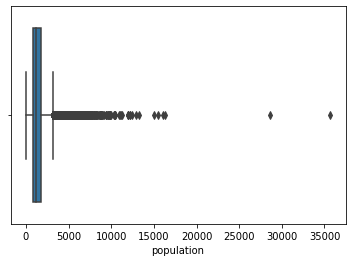

In [ ]:
sns.boxplot(datas['population'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


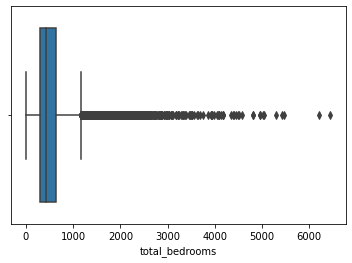

In [ ]:
sns.boxplot(datas['total_bedrooms'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


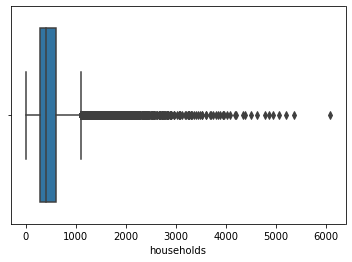

In [ ]:
sns.boxplot(datas['households'])

A lot of **outliers** in `population` and `total_rooms` $=>$ cleaning might improve the results

Cleaning algorithms

In [ ]:
def tri_a_bulle(liste):
  l = len(liste) 
  for i in range(l):
    for j in range(l - i - 1):
      if liste[j] > liste[j+1]:
        liste[j],liste[j+1] = liste[j+1],liste[j]
  return liste


def find_min_max(data_set):
  liste_travail = list(data_set)
  liste_triée = tri_a_bulle(liste_travail)
  i_Q1 = len(liste_triée)//4
  i_Q3 = len(liste_triée)//2 + len(liste_triée)//4
  Q1 = liste_triée[i_Q1]
  Q3 = liste_triée[i_Q3]
  IQR = Q3-Q1
  min = Q1 - 1.5 * IQR
  max = Q3 + 1.5 * IQR
  return min,max


In [ ]:
liste_indices = []
min_mhv,max_mhv = find_min_max(datas['households'])
min_p,max_p = find_min_max(datas['population'])
min_tr,max_tr = find_min_max(datas['total_bedrooms'])
for i in range(len(list(datas['population']))):
  if min_mhv > datas['households'][i] or max_mhv < datas['households'][i]:
    liste_indices.append(i)
  elif min_p > datas['population'][i] or max_p < datas['population'][i]:
    liste_indices.append(i)
  elif min_tr > datas['total_bedrooms'][i] or max_tr < datas['total_bedrooms'][i]:
    liste_indices.append(i)
datas = datas.drop(liste_indices)

Cleaned datas

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


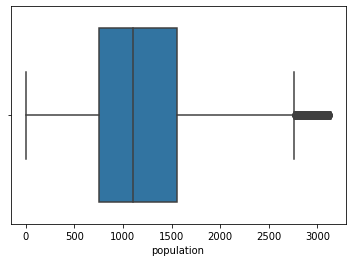

In [ ]:
sns.boxplot(datas['population'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


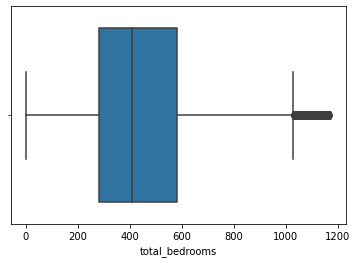

In [ ]:
sns.boxplot(datas['total_bedrooms'])

* Linear Regression

In [ ]:
y = datas['total_bedrooms']
X = datas[['population','households']]
#création du jeux de données d'entraînement et de tests 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, train_size=0.75)

model = LinearRegression()
model.fit(X_train,y_train)

y_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

In [ ]:
print("score sur les données de train: ", model.score(X_train,y_train))
print("score sur les données de test: ", model.score(X_test,y_test))

score sur les données de train:  0.9006190650361491
score sur les données de test:  0.9018070635312941


In [ ]:
datas['Predicted_bedrooms'] = model.predict(datas[['population','households']])

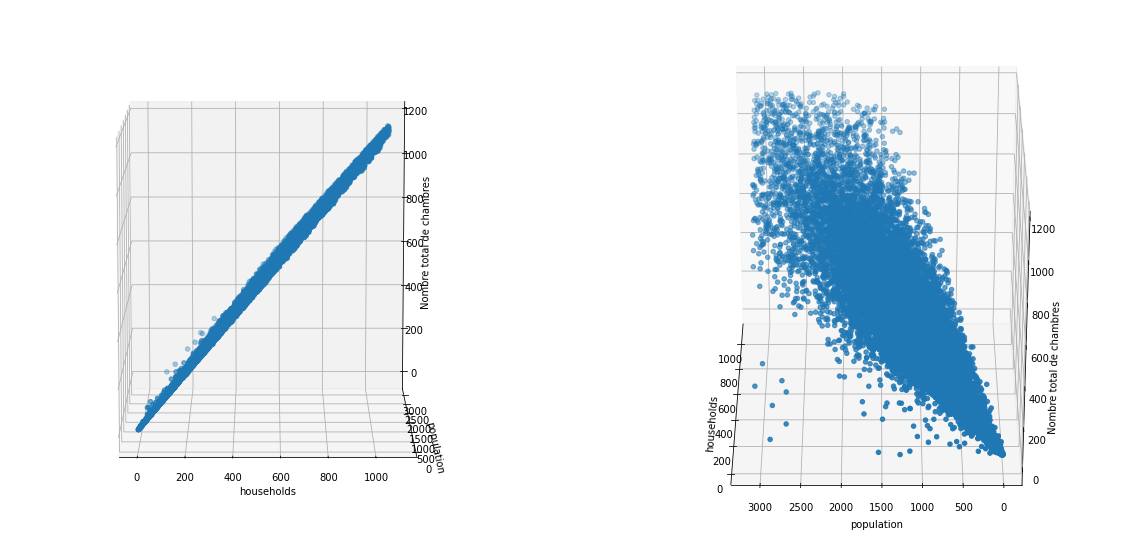

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection = '3d')
ax.scatter(datas['households'], datas['population'], datas['Predicted_bedrooms'])
ax.view_init(elev=10, azim=-90)
ax.set_xlabel('households')
ax.set_ylabel('population')
ax.set_zlabel('Nombre total de chambres')

ax2 = fig.add_subplot(122, projection = '3d')
ax2.scatter(datas['households'], datas['population'], datas['Predicted_bedrooms'])
ax2.view_init(elev=30, azim=-180)
ax2.set_xlabel('households')
ax2.set_ylabel('population')
ax2.set_zlabel('Nombre total de chambres')

plt.show()

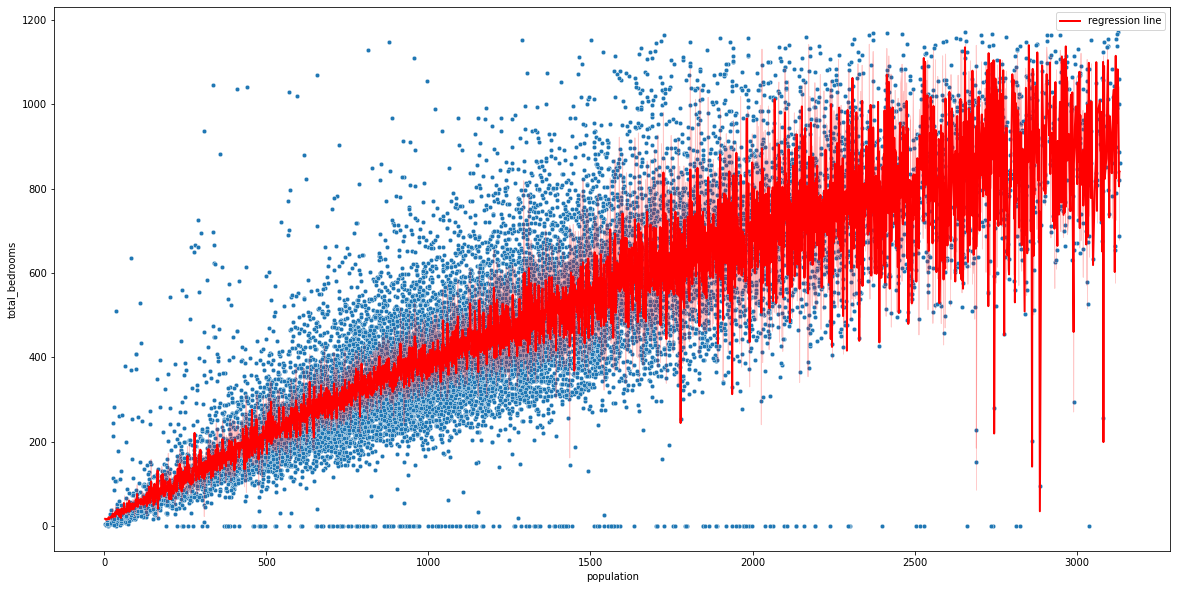

In [ ]:
fig = plt.figure(figsize=(20,10))

sns.scatterplot(data=datas, x = datas['population'], y = datas['total_bedrooms'], s=20)
sns.lineplot(x = datas['population'], y = datas['Predicted_bedrooms'], color='red', label='regression line', linewidth=2.0)

In [ ]:
y_pred=model.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('RMSE =', mean_squared_error(y_test, y_pred))

MAE = 33.4371603920814
RMSE = 5254.637049367866


* KNeighbors

In [ ]:
#instanciation du scaler et détermination de la transformation à appliquer aux données
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
#application de la transformation aux données
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=90, weights='distance', metric='minkowski', p=2)
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=90, weights='distance')

In [ ]:
print("Score sur serie train: ", knn.score(x_train_scaled, y_train))
print("Score sur serie test: ", knn.score(x_test_scaled, y_test))

Score sur serie train:  0.9986004265944444
Score sur serie test:  0.8986510550889381
